# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [15]:
print(male_df.describe())
print(female_df.describe())

            Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699
            Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

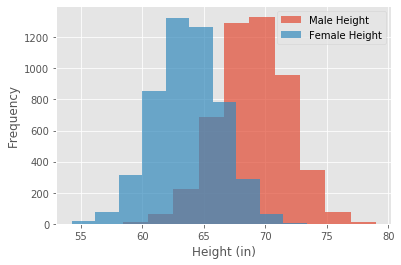

In [19]:
plt.figure()
male_df.Height.plot.hist(label="Male Height", alpha=0.7, bins=10)
female_df.Height.plot.hist(label="Female Height", alpha=0.7, bins=10)
plt.xlabel("Height (in)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?
# Yes, this seems to be pretty indicative of typical heights of men and women

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

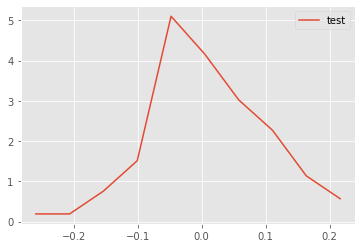

In [23]:
def density(x):
    hist, bin_edges = np.histogram(x, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(hist.size)
    pdfy = np.zeros(hist.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(hist.size):
        pdfx[k] = 0.5*(bin_edges[k]+bin_edges[k+1])
        pdfy[k] = hist[k]

    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

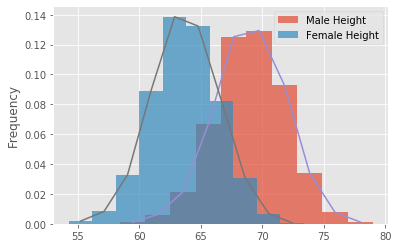

In [31]:
male_df.Height.plot.hist(density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
xm,ym = density(male_df.Height)
plt.plot(xm,ym)
xf,yf = density(female_df.Height)
plt.plot(xf,yf)
plt.show()

## Repeat the above exercise for male and female weights

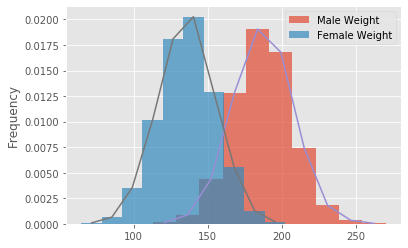

In [32]:
# Your code here
male_df.Weight.plot.hist(density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
xm,ym = density(male_df.Weight)
plt.plot(xm,ym)
xf,yf = density(female_df.Weight)
plt.plot(xf,yf)
plt.show()

## Write your observations in the cell below

In [33]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?
# Male and female weights generally follow normal distributions, that overlap on the lower end of the male distribution
# and the higher end of the female distribution.

## Repeat the above experiments in seaborn and compare with your results

In [35]:
import seaborn as sns

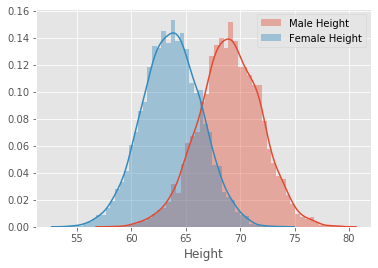

In [37]:
sns.distplot(male_df.Height, label="Male Height")
sns.distplot(female_df.Height, label="Female Height")
plt.legend()
plt.show()

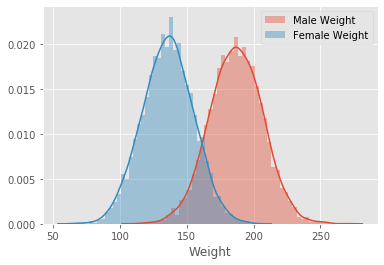

In [38]:
sns.distplot(male_df.Weight, label="Male Weight")
sns.distplot(female_df.Weight, label="Female Weight")
plt.legend()
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.